In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
corelated_df = pd.read_csv("wine_quality_preprocessed.csv")
corelated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   volatile acidity  6497 non-null   float64
 1   chlorides         6497 non-null   float64
 2   density           6497 non-null   float64
 3   alcohol           6497 non-null   float64
 4   quality           6497 non-null   float64
 5   Wine Type_Red     6497 non-null   float64
 6   Wine Type_White   6497 non-null   float64
dtypes: float64(7)
memory usage: 355.4 KB


In [3]:
X = corelated_df[['volatile acidity', 'chlorides', 'density', 'alcohol']].values
y = corelated_df['quality'].values.reshape(-1, 1) 
N = X.shape[0] 
train_size = int(0.8 * N) 
index_number = np.arange(N)
np.random.shuffle(index_number)
train_indices = index_number[:train_size]
test_indices = index_number[train_size:]
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

X_train shape: (5197, 4)
y_train shape: (5197, 1)
X_test shape: (1300, 4)
y_test shape: (1300, 1)


Mean Squared Error: 0.04861691510455148


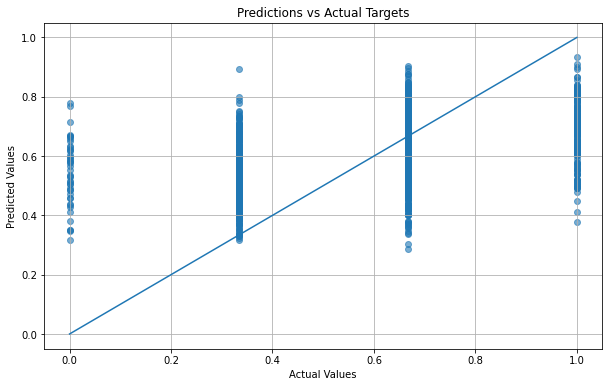

In [6]:
def calculate_weights(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

w = calculate_weights(X_train_bias, y_train)
y_pred = X_test_bias @ w
mse = calculate_mse(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()]) 
plt.title('Predictions vs Actual Targets - Linear Regression using OLS')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()